In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# creating EDA imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

<IPython.core.display.Javascript object>

In [3]:
# reading in each data file
# data was obtained from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data

app_events = pd.read_csv("./talkingdata-mobile-user-demographics/app_events.csv.zip")
app_labels = pd.read_csv("./talkingdata-mobile-user-demographics/app_labels.csv.zip")
events = pd.read_csv("./talkingdata-mobile-user-demographics/events.csv.zip")
gender_age_train = pd.read_csv(
    "./talkingdata-mobile-user-demographics/gender_age_train.csv.zip"
)
gender_age_test = pd.read_csv(
    "./talkingdata-mobile-user-demographics/gender_age_test.csv.zip"
)
category_labels = pd.read_csv(
    "./talkingdata-mobile-user-demographics/label_categories.csv.zip"
)
phone_brand = pd.read_csv(
    "./talkingdata-mobile-user-demographics/phone_brand_device_model.csv.zip"
)

<IPython.core.display.Javascript object>

# Merging the Data

In [4]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


<IPython.core.display.Javascript object>

In [5]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


<IPython.core.display.Javascript object>

In [6]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


<IPython.core.display.Javascript object>

In [7]:
category_labels.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


<IPython.core.display.Javascript object>

In [8]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


<IPython.core.display.Javascript object>

In [9]:
# 三星 samsung
# 天语 Ktouch
# 海信 hisense
# 联想 lenovo
# 欧比 obi
# 爱派尔 ipair
# 努比亚 nubia
# 优米 youmi
# 朵唯 dowe
# 黑米 heymi
# 锤子 hammer
# 酷比魔方 koobee
# 美图 meitu
# 尼比鲁 nibilu
# 一加 oneplus
# 优购 yougo
# 诺基亚 nokia
# 糖葫芦 candy
# 中国移动 ccmc
# 语信 yuxin
# 基伍 kiwu
# 青橙 greeno
# 华硕 asus
# 夏新 panosonic
# 维图 weitu
# 艾优尼 aiyouni
# 摩托罗拉 moto
# 乡米 xiangmi
# 米奇 micky
# 大可乐 bigcola
# 沃普丰 wpf
# 神舟 hasse
# 摩乐 mole
# 飞秒 fs
# 米歌 mige
# 富可视 fks
# 德赛 desci
# 梦米 mengmi
# 乐视 lshi
# 小杨树 smallt
# 纽曼 newman
# 邦华 banghua
# E派 epai
# 易派 epai
# 普耐尔 pner
# 欧新 ouxin
# 西米 ximi
# 海尔 haier
# 波导 bodao
# 糯米 nuomi
# 唯米 weimi
# 酷珀 kupo
# 谷歌 google
# 昂达 ada
# 聆韵 lingyun
# Will use dictionary to convert to English
phone_brand.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


<IPython.core.display.Javascript object>

In [10]:
# Merging app_events and event_id through event_id column
merged_events = pd.merge(app_events, events, on="event_id")

<IPython.core.display.Javascript object>

In [11]:
# Merging app_labels and category_labels through label_id
merged_apps = pd.merge(app_labels, category_labels, on="label_id")

<IPython.core.display.Javascript object>

In [12]:
# Merging previous merged data tables together to make larger data frame
merged_events_apps = pd.merge(merged_events, merged_apps, on="app_id")

<IPython.core.display.Javascript object>

In [ ]:
# Adding phone brand to merged_events_apps through device_id merge
merged_events_apps_brands = pd.merge(merged_events_apps, phone_brand, on="device_id")

In [ ]:
# Creating final data frame by merging gender and age with previous dataframe
final_df = pd.merge(merged_events_apps_brands, gender_age_train, on="device_id")
final_df.head()

# Converting Phone Brands to English

In [ ]:
to_english = {
    "华为": "huawei",  # manually translated and entered
    "小米": "xiaomi",  # manually translated and entered
    "魅族": "meizu",  # manually translated and entered
    "vivo": "vivo",  # manually translated and entered
    "酷派": "coolpad",  # manually translated and entered
    "索尼": "sony",  # manually translated and entered
    "OPPO": "oppo",  # manually translated and entered
    "LG": "lg",  # manually translated and entered
    "HTC": "htc",  # manually translated and entered
    "金立": "gionee",  # manually translated and entered
    "中兴": "zte",  # manually translated and entered
    "奇酷": "qiku",  # manually translated and entered
    "TCL": "tcl",  # manually translated and entered
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
}

In [ ]:
# Created new column for phone brand, can now drop old phone_brand column
final_df["english_phone_brand"] = final_df["phone_brand"].map(to_english)
final_df = final_df.drop(columns=["phone_brand"])

# Examining the Features

In [ ]:
# Checking for missing values
# For the english_phone_brand column it appears less than 1% of data is missing, so drop the missing data
final_df.isna().mean()

In [ ]:
final_df = final_df.dropna()

In [ ]:
# Checking the shape of the dataframe
# A little under 80 million rows, this could lead to longer execution time
# Will consider using Dask
final_df.shape

In [ ]:
# Checking data types of each column
# timestamp is an object type,
# convert timestamp to datetime type
final_df.dtypes

In [ ]:
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"])

# Checking for Sufficient Amount of Values

In [ ]:
# pd.set_option("display.max_rows", None)

In [ ]:
# Only want to keep event_id with enough data,
# Drop event_id rows with < 100 values
final_df["event_id"].value_counts()

In [ ]:
count = final_df["event_id"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["event_id"].isin(keep)]

In [ ]:
# Only want to keep app_id values with enough data,
# Drop app_id rows with < 1000 values
final_df["app_id"].value_counts()

In [ ]:
count = final_df["app_id"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["app_id"].isin(keep)]

In [ ]:
# Since this column only has one unique value, it does not seem important to keep for analysis,
# Will drop this column.
final_df["is_installed"].value_counts()

In [ ]:
# Appears to be enough information for each value
# Will leave this column alone.
final_df["is_active"].value_counts()

In [ ]:
# Only want to keep device_id values with enough data,
# Drop device_id rows with < 1000 values
final_df["device_id"].value_counts()

In [ ]:
count = final_df["device_id"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["device_id"].isin(keep)]

In [ ]:
# Only want to keep timestamp values with enough data,
# Drop timestamp rows with < 100 values
final_df["timestamp"].value_counts()

In [ ]:
count = final_df["timestamp"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["timestamp"].isin(keep)]

In [ ]:
# Only want to keep longitude values with enough data,
# Drop longitude rows with < 10000 values
final_df["longitude"].value_counts()

In [ ]:
count = final_df["longitude"].value_counts()
keep = count[count >= 10000].index
final_df = final_df[final_df["longitude"].isin(keep)]

In [ ]:
# Only want to keep latitude values with enough data,
# Drop latitude rows with < 10000 values
final_df["latitude"].value_counts()

In [ ]:
count = final_df["latitude"].value_counts()
keep = count[count >= 10000].index
final_df = final_df[final_df["latitude"].isin(keep)]

In [ ]:
# Only want to keep label_id values with enough data,
# Drop label_id rows with < 1000 values
final_df["label_id"].value_counts()

In [ ]:
count = final_df["label_id"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["label_id"].isin(keep)]

In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["category"].value_counts()

In [ ]:
# Only want to keep device_model values with enough data,
# Drop device_model rows with < 1000 values
final_df["device_model"].value_counts()

In [ ]:
count = final_df["device_model"].value_counts()
keep = count[count >= 1000].index
final_df = final_df[final_df["device_model"].isin(keep)]

In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["gender"].value_counts()

In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["age"].value_counts()

In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["group"].value_counts()

In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
final_df["english_phone_brand"].value_counts()

# Removing Unnecessary Columns

In [ ]:
final_df.head()

In [ ]:
# Since is_installed only have one unique value this column will be dropped.
# Getting rid of category column and using label_id to identify category
final_df = final_df.drop(
    columns=["is_installed", "timestamp", "latitude", "longitude", "category"]
)
final_df.head()

In [ ]:
# Gets rid of duplicate rows and adds count as size
final_df = final_df.groupby(final_df.columns.tolist(), as_index=False).size()
final_df.head()

In [ ]:
# Creating unique column for device and app ids
final_df["download_id"] = final_df["app_id"] + final_df["device_id"]

In [ ]:
final_df.head()

In [ ]:
# Creating new dataframe grouping download ids to create list of label ids
label_ids = (
    final_df.groupby(["download_id"])
    .agg(lambda x: tuple(x))
    .applymap(list)
    .reset_index()[["label_id", "download_id"]]
)
label_ids.head()

In [ ]:
len(label_ids)

In [ ]:
# Adding the download_id column to original dataframe
final_df = final_df.merge(label_ids, how="left", on="download_id")

In [ ]:
final_df.head()

In [ ]:
final_df.shape

In [ ]:
# Dropping duplicate rows
final_df = final_df.drop_duplicates(["download_id"], keep="first")

In [ ]:
# Need to reduce to around 2 million rows
final_df.shape

In [ ]:
final_df.isna().mean()

In [ ]:
final_df.head(10)

In [ ]:
# Only used the download_id column to create multiple labels in one column, so no longer need that column
# Also do not need the label_id_x column since label_id_y contains all the labels
final_df = final_df.drop(columns=["label_id_x", "download_id"])
final_df.head()

In [ ]:
final_df.shape

# Checking Value Counts for New DataFrame

In [ ]:
# pd.set_option("display.max_rows", None)

In [ ]:
final_df["event_id"].value_counts()

In [ ]:
# Only keep data that contains at least 10 counts,
count = final_df["event_id"].value_counts()
keep = count[count >= 10].index
final_df = final_df[final_df["event_id"].isin(keep)]

In [ ]:
final_df["device_model"].value_counts()

In [ ]:
# Only keep data that contains at least 100 counts,
count = final_df["device_model"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["device_model"].isin(keep)]

In [ ]:
final_df["english_phone_brand"].value_counts()

In [ ]:
# Only keep data that contains at least 100 counts,
count = final_df["english_phone_brand"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["english_phone_brand"].isin(keep)]

In [ ]:
final_df["size"].value_counts()

In [ ]:
# Only keep data that contains at least 100 counts,
count = final_df["size"].value_counts()
keep = count[count >= 100].index
final_df = final_df[final_df["size"].isin(keep)]

In [ ]:
final_df.shape

In [ ]:
final_df["device_id"].value_counts()

After doing some data cleaning, the dataframe went from 78,692,532 rows by 15 columns to 435,990 rows by 11 columns. 

# Preparing Data For Analysis

## One Hot Encoding Categorical Columns

In [73]:
# Encoding the label_id_y column
mlb = MultiLabelBinarizer()
final_df = final_df.join(
    pd.DataFrame(
        mlb.fit_transform(final_df.pop("label_id_y")),
        columns=mlb.classes_,
        index=final_df.index,
    )
)

<IPython.core.display.Javascript object>

In [74]:
final_df = pd.get_dummies(
    final_df, columns=["english_phone_brand", "device_model"], drop_first=True
)
final_df.head()

,event_id,app_id,is_active,device_id,gender,age,group,size,8,9,...,device_model_魅蓝,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8
0,6,-8764672938472212518,1,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-8271866350659046570,0,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,6,-7509752927626140732,0,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,-7377004479023402858,1,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0
33,6,-5839858269967688123,0,1476664663289716375,M,19,M22-,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Dropping Unnecessary Columns

In [75]:
# Since I will be using group as the target variable, and group contains both age and gender, I can drop gender/age column
# Size of Duplicate rows does not seem like it is too important mainly because there were not many duplicate rows, drop size
final_df = final_df.drop(columns=["gender", "age", "size"])
final_df.head()

,event_id,app_id,is_active,device_id,group,8,9,10,11,12,...,device_model_魅蓝,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8
0,6,-8764672938472212518,1,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,-8271866350659046570,0,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,6,-7509752927626140732,0,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,-7377004479023402858,1,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,6,-5839858269967688123,0,1476664663289716375,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [76]:
final_df.shape

(435990, 635)

<IPython.core.display.Javascript object>

# Create Visualization

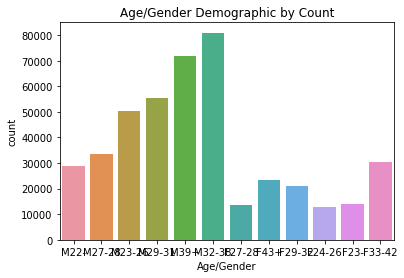

<IPython.core.display.Javascript object>

In [77]:
# Need to change font size of x and y axis
sns.countplot(final_df["group"])
plt.title("Age/Gender Demographic by Count")
plt.ylabel("count")
plt.xlabel("Age/Gender")
plt.show()

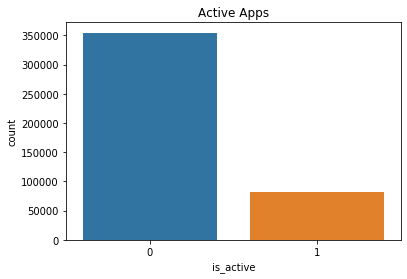

<IPython.core.display.Javascript object>

In [78]:
# It seems like most of the data is for non-active apps, however there are still a good amount of active apps.
sns.countplot(final_df["is_active"])
plt.title("Active Apps")
plt.show()

# Saving Cleaned Data as a New CSV

In [79]:
# When finished with cleaning, save it as a csv to use for future notebooks and save time
# final_df.to_csv("cleaned_data.csv", index=False)

<IPython.core.display.Javascript object>

In [80]:
# Check to see if cleaned csv is in working directory
# !dir

<IPython.core.display.Javascript object>